# Data Loading

Sebelum mengeksplorasi data, import terlebih dahulu library-library dasar yang akan digunakan dalam visualisasi dan eksplorasi data.

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import dataset dari file berformat csv dan tampilkan menggunakan Pandas Dataframe.

In [174]:
stroke_dataset = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
stroke_dataset = pd.DataFrame(stroke_dataset)
stroke_dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Karena fitur id hanya berisi primary key atau identifier unik dari dataset, maka fitur ini jelas tidak akan berpengaruh pada status stroke pasien. Fitur id dihapus dan ukuran fitur dataset berkurang 1.

In [175]:
stroke_dataset.drop(['id'], inplace=True, axis=1)
stroke_dataset.shape

(5110, 11)

Gunakan method info() untuk mendapatkan gambaran mengenai jumlah field, record, dan tipe data tiap field.

# Data Handling - Missing Value

In [176]:
stroke_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Melalui rangkuman dataset di atas, kita dapat mengetahui adanya missing value pada fitur bmi. Hapus semua missing value dan ukuran record dataset berkurang 201.

In [177]:
stroke_dataset = stroke_dataset.dropna()
stroke_dataset = stroke_dataset.reset_index(drop=True)
stroke_dataset.shape

(4909, 11)

# Data Handling - Outliers

Gunakan method describe() dengan parameter include diatur sama dengan all agar deskripsi statistik dari seluruh fitur dapat ditampilkan, baik fitur numerik ataupun kategorik.

In [178]:
stroke_dataset.describe(include = "all")

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909,4909.000000,4909.000000,4909.000000,4909,4909,4909,4909.000000,4909.000000,4909,4909.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2897,NaN,NaN,NaN,3204,2811,2490,NaN,NaN,1852,NaN
mean,NaN,42.865374,0.091872,0.049501,NaN,NaN,NaN,105.305150,28.893237,NaN,0.042575
std,NaN,22.555115,0.288875,0.216934,NaN,NaN,NaN,44.424341,7.854067,NaN,0.201917
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.070000,23.500000,NaN,0.000000
50%,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.680000,28.100000,NaN,0.000000
75%,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,113.570000,33.100000,NaN,0.000000


Kita lakukan eksplorasi visual fitur numerik untuk mendeteksi keberadaan outlier.

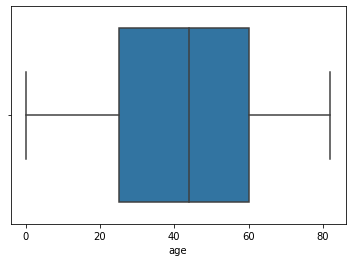

In [179]:
sns.boxplot(x=stroke_dataset['age'])

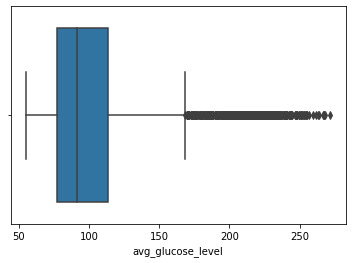

In [180]:
sns.boxplot(x=stroke_dataset['avg_glucose_level'])

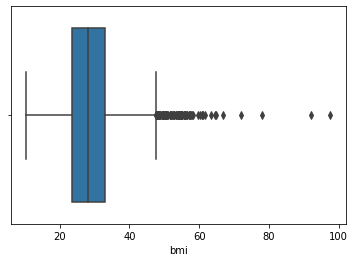

In [181]:
sns.boxplot(x=stroke_dataset['bmi'])

Boxplot dari fitur avg_glucose_level dan bmi menunjukkan adanya outlier. Kita gunakan metode IQR untuk menghilangkan outlier. Ukuran record dataset berkurang 2.

In [182]:
Q1 = stroke_dataset["bmi"].describe()['25%']
Q3 = stroke_dataset["bmi"].describe()['75%']
IQR = Q3 - Q1
stroke_dataset = stroke_dataset.loc[(stroke_dataset[['bmi']] < Q3+1.5*IQR).all(axis=1)]
stroke_dataset.shape

(4796, 11)

In [183]:
Q1 = stroke_dataset["avg_glucose_level"].describe()['25%']
Q3 = stroke_dataset["avg_glucose_level"].describe()['75%']
IQR = Q3 - Q1
stroke_dataset = stroke_dataset.loc[(stroke_dataset[['avg_glucose_level']] < Q3+1.5*IQR).all(axis=1)]
stroke_dataset.shape

(4255, 11)

# Data Handling - Univariate Analysis

Kelompokkan fitur-fitur kategorik dan numerik dari dataset.

In [184]:
kategorik = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
numerik = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]

Visualisasikan jumlah record per tiap distinct value dari fitur gender.

        jumlah data
Female         2528
Male           1726
Other             1


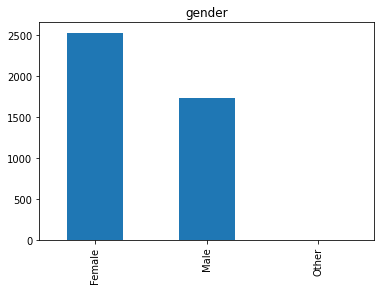

In [185]:
fitur = kategorik[0]
count = stroke_dataset[fitur].value_counts()
visual_dataframe = pd.DataFrame({'jumlah data':count})
print(visual_dataframe)
count.plot(kind='bar', title=fitur)

Karena gender unknown tidak akan memberikan insight yang baik terhadap studi ini, maka record tersebut dihapus dan ukuran record dataset berkurang 1.

In [186]:
stroke_dataset = stroke_dataset.loc[(stroke_dataset["gender"] != "Other")]
stroke_dataset.shape

(4254, 11)

Visualisasikan jumlah record per tiap distinct value dari fitur ever_married, work_type, dan Residence_type untuk melihat apa saja unique value yang dimiliki tiap fitur.



     jumlah data
Yes         2642
No          1612


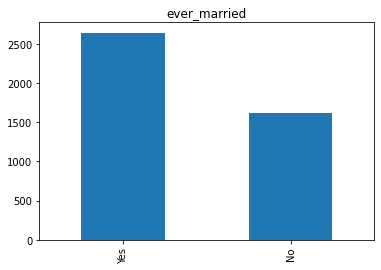

In [187]:
fitur = kategorik[1]
count = stroke_dataset[fitur].value_counts()
visual_dataframe = pd.DataFrame({'jumlah data':count})
print(visual_dataframe)
count.plot(kind='bar', title=fitur)

               jumlah data
Private               2411
children               661
Self-employed          629
Govt_job               531
Never_worked            22


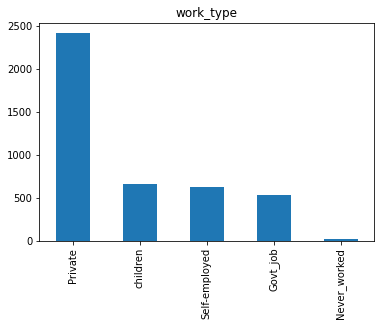

In [188]:
fitur = kategorik[2]
count = stroke_dataset[fitur].value_counts()
visual_dataframe = pd.DataFrame({'jumlah data':count})
print(visual_dataframe)
count.plot(kind='bar', title=fitur)

       jumlah data
Urban         2157
Rural         2097


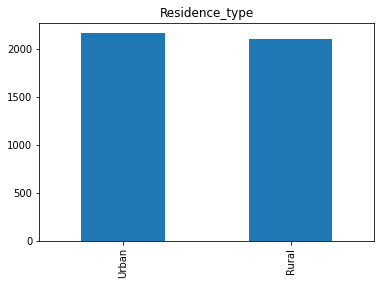

In [189]:
fitur = kategorik[3]
count = stroke_dataset[fitur].value_counts()
visual_dataframe = pd.DataFrame({'jumlah data':count})
print(visual_dataframe)
count.plot(kind='bar', title=fitur)

Visualisasikan jumlah record per tiap distinct value dari fitur smoking_status.

                 jumlah data
never smoked            1569
Unknown                 1380
formerly smoked          669
smokes                   636


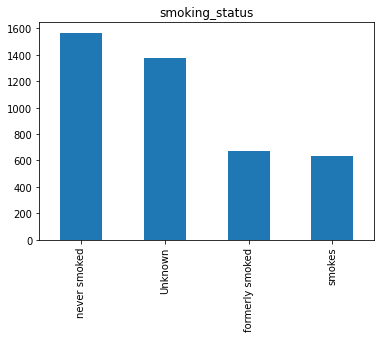

In [190]:
fitur = kategorik[4]
count = stroke_dataset[fitur].value_counts()
visual_dataframe = pd.DataFrame({'jumlah data':count})
print(visual_dataframe)
count.plot(kind='bar', title=fitur)

Karena smoking_status unknown tidak akan memberikan insight yang baik terhadap studi ini, maka record tersebut dihapus dan ukuran record dataset berkurang 1482.

In [191]:
stroke_dataset = stroke_dataset.loc[(stroke_dataset["smoking_status"] != "Unknown")]
stroke_dataset.shape

(2874, 11)

# Data Handling - Multivariate Analysis

Lakukan analisis multivariat dari seluruh fitur kategorik terhadap fitur stroke untuk melihat pengaruh tiap fitur terhadap fitur stroke menggunakan barplot.

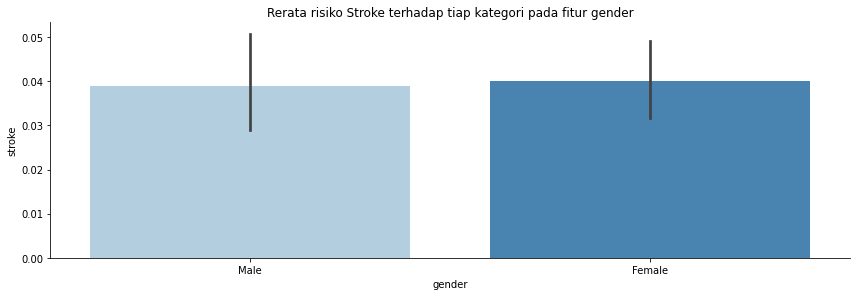

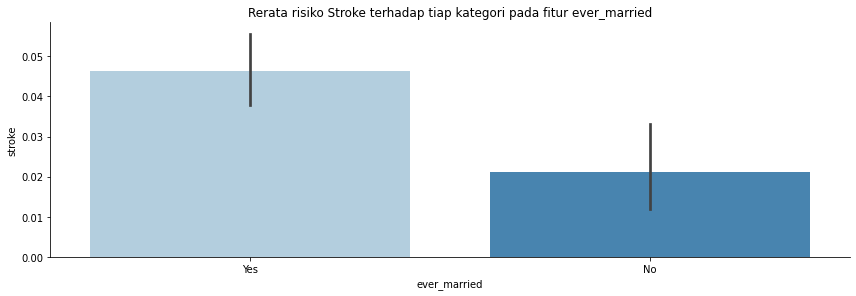

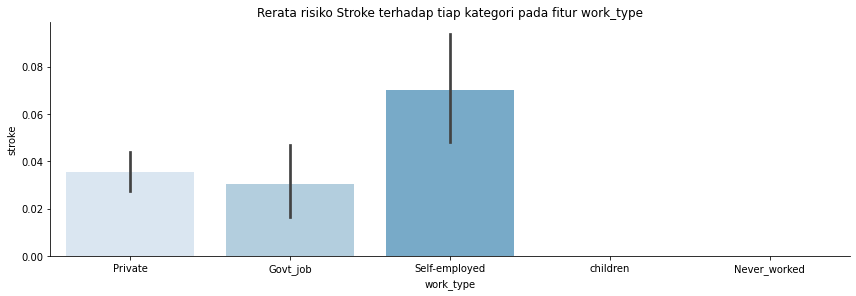

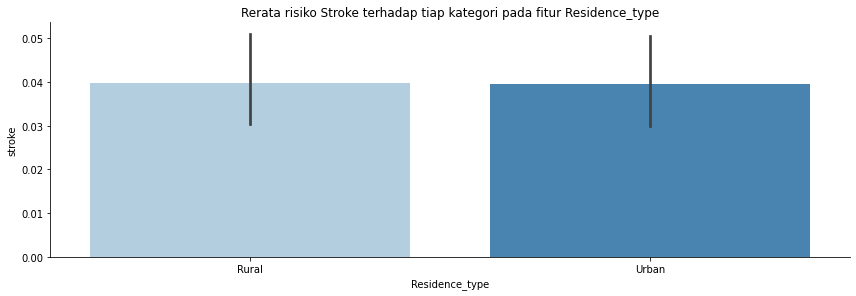

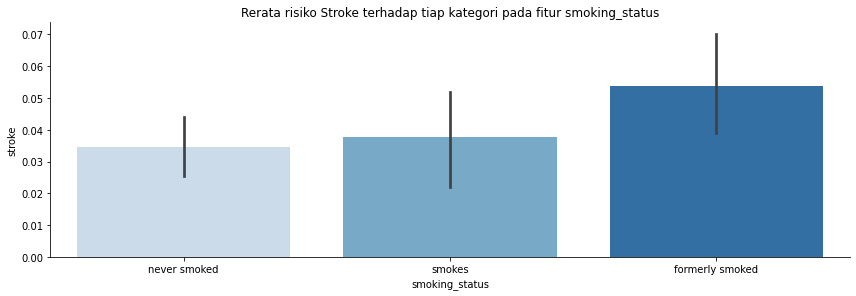

In [192]:
fitur_kategorik = stroke_dataset.select_dtypes(include='object').columns.to_list()
 
for col in fitur_kategorik:
  sns.catplot(x=col, y="stroke", kind="bar", dodge=False, height = 4, aspect = 3,  data=stroke_dataset, palette="Blues")
  plt.title("Rerata risiko Stroke terhadap tiap kategori pada fitur {}".format(col))

Karena rerata risiko stroke dari tiap kelompok pada fitur gender dan Residence_type relatif setara, maka dua fitur ini dapat dihapus. Fitur dataset berkurang 2.

In [193]:
stroke_dataset.drop(["gender", "Residence_type"], inplace=True, axis=1)
kategorik.remove("gender")
kategorik.remove("Residence_type")
stroke_dataset.shape

(2874, 9)

Lakukan analisis multivariat dari seluruh fitur numerik menggunakan heatmap.

Text(0.5, 1.0, 'Matriks Korelasi Fitur-Fitur Numerik')

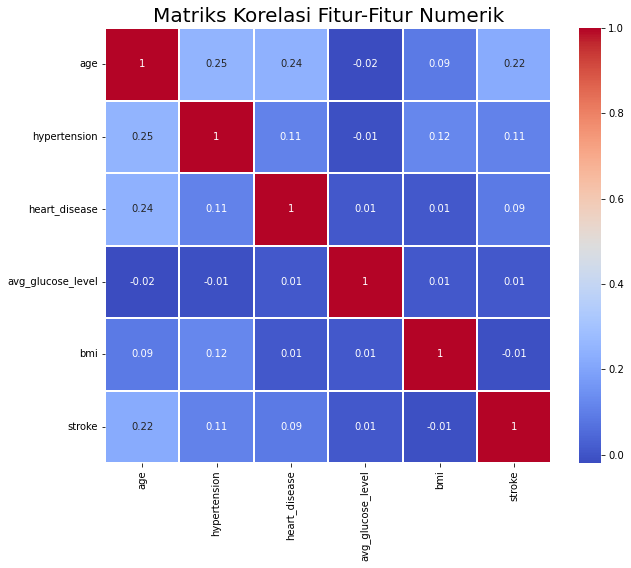

In [194]:
plt.figure(figsize=(10, 8))
correlation_matrix = stroke_dataset.corr().round(2)
 
# Untuk mencetak nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=1, )
plt.title("Matriks Korelasi Fitur-Fitur Numerik", size=20)

Karena skor korelasi antara fitur bmi dengan stroke sangat kecil, maka fitur bmi dapat dihapus. Fitur dataset berkurang 1.

In [195]:
stroke_dataset.drop(['bmi'], inplace=True, axis=1)
numerik.remove("bmi")
stroke_dataset.shape

(2874, 8)

# Data Preparation

Agar fitur kategorik dapat dipelajari oleh model, lakukan OneHotEncoding. Encoding jenis ini membantu melabeli kategori dari tiap fitur tanpa memberikan peringkat bahwa 1 kategori lebih baik dari kategori lain.

In [196]:
from sklearn.preprocessing import OneHotEncoder
stroke_dataset = pd.concat([stroke_dataset, pd.get_dummies(stroke_dataset[kategorik[0]], prefix=kategorik[0])],axis=1)
stroke_dataset = pd.concat([stroke_dataset, pd.get_dummies(stroke_dataset[kategorik[1]], prefix=kategorik[1])],axis=1)
stroke_dataset = pd.concat([stroke_dataset, pd.get_dummies(stroke_dataset[kategorik[2]], prefix=kategorik[2])],axis=1)
stroke_dataset.drop([kategorik[0], kategorik[1], kategorik[2]], axis=1, inplace=True)
stroke_dataset

,age,hypertension,heart_disease,avg_glucose_level,stroke,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1,80.0,0,1,105.92,1,0,1,0,0,1,0,0,0,1,0
5,74.0,1,1,70.09,1,0,1,0,0,1,0,0,0,1,0
6,69.0,0,0,94.39,1,1,0,0,0,1,0,0,0,1,0
8,81.0,1,0,80.43,1,0,1,0,0,1,0,0,0,1,0
9,61.0,0,1,120.46,1,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4900,82.0,1,0,71.97,0,0,1,0,0,0,1,0,0,1,0
4902,57.0,0,0,77.93,0,0,1,0,0,1,0,0,0,1,0
4905,81.0,0,0,125.20,0,0,1,0,0,0,1,0,0,1,0
4906,35.0,0,0,82.99,0,0,1,0,0,0,1,0,0,1,0


Split dataset untuk training dan testing dengan rasio 80:20.

In [197]:
from sklearn.model_selection import train_test_split
 
X = stroke_dataset.drop(["stroke"], axis =1)
y = stroke_dataset["stroke"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 123,
                                                    stratify = y)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 2874
Total # of sample in train dataset: 2299
Total # of sample in test dataset: 575


Lakukan normalisasi dengan StandardScaler agar nilai fitur numerik pada X_train dan X_test berada pada rentang [-1, 1].

In [198]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
minmax.fit(X_train[numerik])
X_train[numerik] = minmax.transform(X_train.loc[:, numerik])
X_train[numerik]

,age,hypertension,heart_disease,avg_glucose_level
1971,0.888889,0.0,0.0,0.090480
4243,0.708333,0.0,0.0,0.792769
1967,0.027778,0.0,0.0,0.026895
3856,0.333333,0.0,0.0,0.273132
3361,0.583333,0.0,0.0,0.497996
...,...,...,...,...
3786,0.541667,0.0,0.0,0.217205
2123,0.333333,0.0,0.0,0.700864
3135,0.638889,0.0,0.0,0.960905
325,0.652778,0.0,0.0,0.155223


In [199]:
X_test[numerik] = minmax.transform(X_test.loc[:, numerik])
X_test[numerik]

,age,hypertension,heart_disease,avg_glucose_level
2796,0.555556,0.0,0.0,0.524802
3796,0.388889,0.0,0.0,0.199305
788,0.125000,0.0,0.0,0.314365
4661,0.055556,0.0,0.0,0.413928
99,0.388889,0.0,0.0,0.241874
...,...,...,...,...
4595,0.152778,0.0,0.0,0.336094
1136,0.750000,1.0,0.0,0.207587
3227,0.583333,0.0,0.0,0.066079
2764,0.638889,0.0,0.0,0.347938


# Model Development

Import library-library yang akan digunakan pada model development, yaitu KNN, Random Forest, dan metrik-metrik evaluasi (MSE dan Accuracy). Metrik Fitting Score (selisih MSE pada data testing dan training) menjadi optimizing metric, sedangkan metrik accuracy menjadi satisficing metric.

In [200]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

In [201]:
# Siapkan dataframe untuk analisis model
models_table = pd.DataFrame(index=['train_mse', 'test_mse', 'fitting_score', 'accuracy'],
                            columns=['KNN', 'RandomForest'])

Pembuatan model KNN dengan jumlah neighbor yang memengaruhi prediksi adalah 5. Hitung metrik evaluasi untuk moodel ini.

In [202]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
models_table.loc['train_mse','KNN'] = round(mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train) * 100, 3)

models_table.loc['test_mse','KNN'] = round(mean_squared_error(y_pred=knn.predict(X_test), y_true=y_test) * 100, 3)
models_table.loc['fitting_score', 'KNN'] = round(mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train) * 100 - mean_squared_error(y_pred=knn.predict(X_test), y_true=y_test) * 100, 3)
models_table.loc['accuracy','KNN'] = round(accuracy_score(y_test, knn.predict(X_test)) * 100, 3)

Pembuatan model Random Forest dengan jumlah estimator adalah 50. Hitung metrik evaluasi untuk moodel ini.

In [203]:
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train, y_train)
models_table.loc['train_mse','RandomForest'] = round(mean_squared_error(y_pred=random_forest.predict(X_train), y_true=y_train) * 100, 3)

models_table.loc['test_mse','RandomForest'] = round(mean_squared_error(y_pred=random_forest.predict(X_test), y_true=y_test) * 100, 3)
models_table.loc['fitting_score', 'RandomForest'] = round(mean_squared_error(y_pred=random_forest.predict(X_test), y_true=y_test) * 100 - mean_squared_error(y_pred=random_forest.predict(X_train), y_true=y_train) * 100, 3)
models_table.loc['accuracy','RandomForest'] = round(accuracy_score(y_test, random_forest.predict(X_test)) * 100, 3)

# Model Evaluation

In [204]:
models_table

,KNN,RandomForest
train_mse,3.958,0.0
test_mse,4.174,4.522
fitting_score,-0.216,4.522
accuracy,95.826,95.478


Nilai accuracy untuk model KNN dan Random Forest sudah memenuhi kriteria (>90%). Nilai fitting_score (tanpa memerhatikan tanda) dari model KNN lebih kecil daripada model Random Forest.

Kesimpulan: model KNN adalah model terbaik untuk diagnosis stroke.